In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as skpreprocessing
from preprocessing import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
cmap = plt.get_cmap("bwr")
cmap.set_bad("white")

# Chargement des données (avec suppression)

In [7]:
x, y = preprocessing("data.csv", threshold=.4)

In [14]:
x = preprocessing("data.csv", threshold=1.0, remove_nones=False, nelement=1000, return_x_y=False)

# Pandas Profiling

# Transformation des données
#### 1 - Application du log sur les données suivant une distribution exponentielle décroissante pour obtenir ici des données suivant une loi normale.
#### 2 - Scale pour obtenir des données centrées réduites

In [21]:
cols = ["DER_mass_MMC", "DER_mass_transverse_met_lep", "DER_mass_vis", "DER_pt_h", "DER_pt_ratio_lep_tau", "DER_pt_tot",
       "DER_sum_pt", "PRI_jet_all_pt", "PRI_lep_pt", "PRI_met", "PRI_met_sumet", "PRI_tau_pt"]
x_log = x.copy()
x_log[cols] = np.log10(x_log[cols] - np.min(x_log[cols], axis=0) + 1)

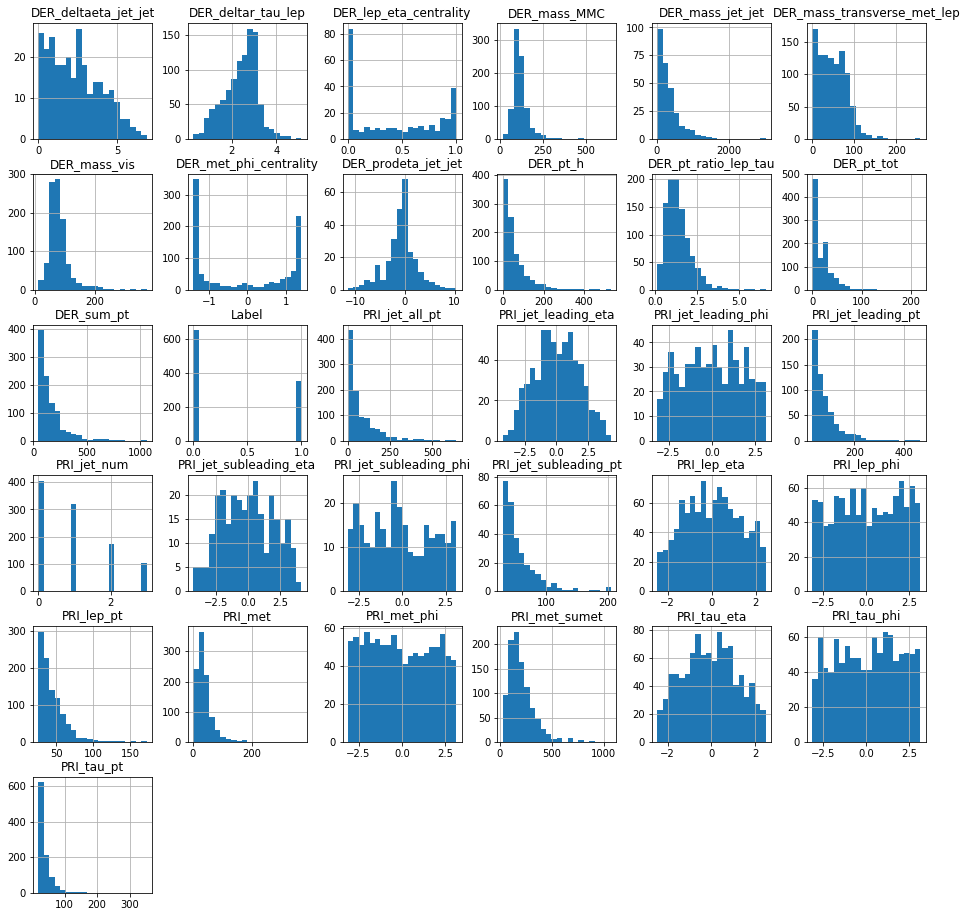

In [22]:
_ = x.hist(figsize=((16, 16)), bins=20)

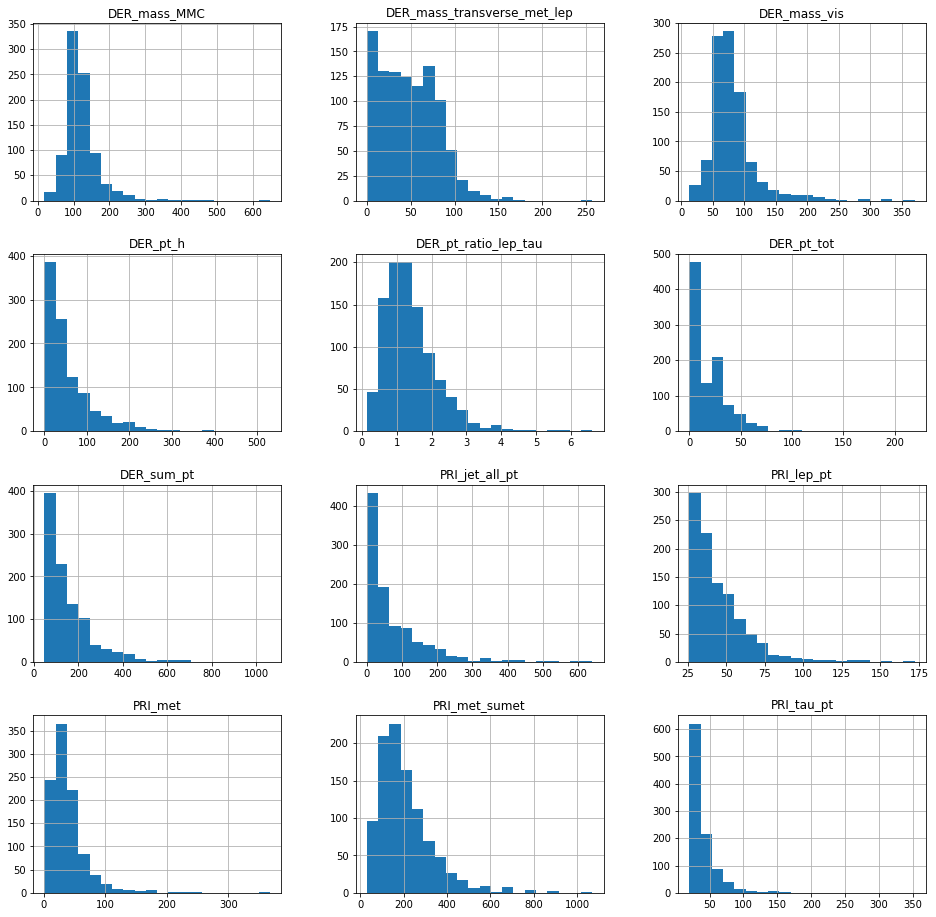

In [23]:
_ = x[cols].hist(figsize=((16, 16)), bins=20)

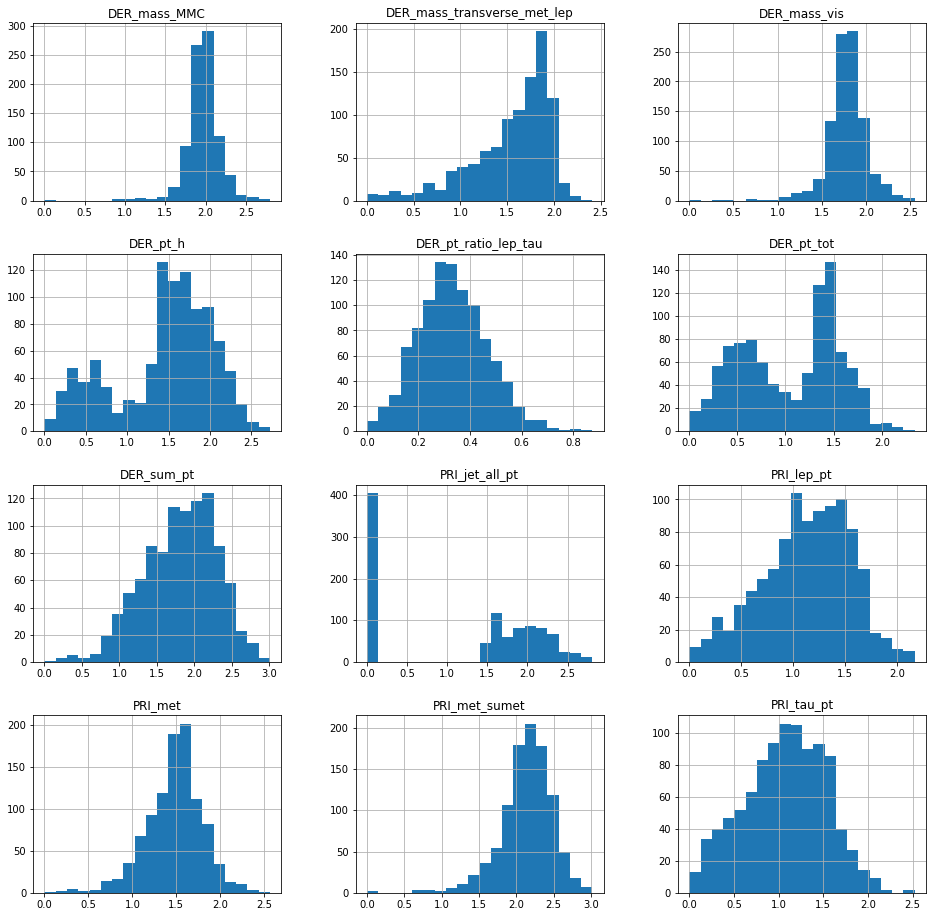

In [24]:
_ = x_log[cols].hist(figsize=((16, 16)), bins=20)

In [25]:
x_scaled = skpreprocessing.scale(x_log)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


# Corrélations

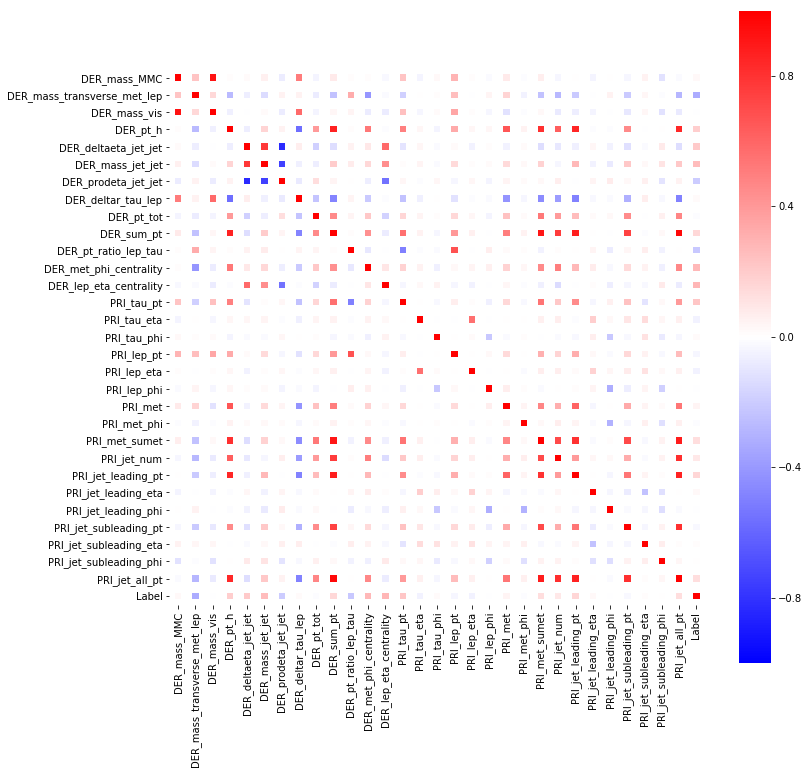

In [5]:
plt.figure(figsize=((12, 12)))
_ = sns.heatmap(x.corr(), vmin=-1, vmax=1, cmap=cmap, linewidths=10, square=True)

In [11]:
n_comp_ini = len(x.columns)
pca = PCA(n_components=n_comp_ini)
x_pca = pca.fit_transform(x_scaled)

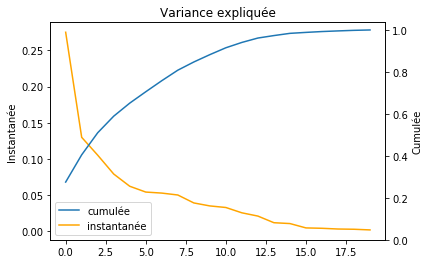

nb component: 20
instant [0.27514875 0.12983594 0.10514165 0.07906758 0.06216437 0.05413831
 0.05271871 0.0500884  0.03909808 0.03496724 0.03279356 0.025442
 0.02092743 0.01175201 0.01058186 0.00455642 0.00404421 0.00303541
 0.00270579 0.00179227]
cumul [0.27514875 0.4049847  0.51012634 0.58919392 0.65135829 0.7054966
 0.75821531 0.80830371 0.84740179 0.88236903 0.91516259 0.94060459
 0.96153202 0.97328404 0.98386589 0.98842231 0.99246652 0.99550193
 0.99820773 1.        ]


In [12]:
l1 = pca.explained_variance_ratio_
l2 = np.cumsum(l1)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
lns1 = ax1.plot(l1, label="instantanée", color='orange')
lns2 = ax2.plot(l2, label="cumulée")
ax2.set_ylim(bottom=0)
ax1.set_title('Variance expliquée')
ax1.set_ylabel('Instantanée')
ax2.set_ylabel('Cumulée')
leg = lns2 + lns1 
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=3)
plt.show()
print("nb component:", n_comp_ini)
print("instant", l1)
print("cumul", l2)

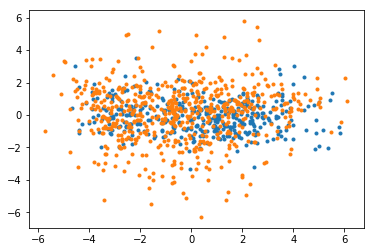

In [13]:
n = 1000
x_2d = np.dot(x_scaled[:n], pca.components_[:2].T)
y2 = y[:n]
plt.scatter(x_2d[y2==1][:, 0], x_2d[y2==1][:, 1], marker='.', label="class1")
plt.scatter(x_2d[y2==0][:, 0], x_2d[y2==0][:, 1], marker='.', label="class2")